# Hacker Statistics

**Scenario** : You are walking up the empire state building and you're playing a game with a friend. You throw a die one hundred times.
- If it's 1 or 2 you'll go one step down
- If it's 3, 4, or 5, you'll go one step up
- If you throw a 6, you'll throw the die again and will walk up the resulting number of steps

Of course, you can not go lower than step number 0. And also, you admit that you're a bit clumsy and have a chance of 0.1% of falling down the stairs when you make a move. Falling down means that you have to start again from step 0. With all of this in mind, you bet with your friend that you'll reach 60 steps high.

### In the Empire State Building bet, your next move depends on the number of eyes you throw with the dice.

In [35]:

# Import numpy and set seed
import numpy as np
np.random.seed(123)
step = 0

dice = np.random.randint(1,7) # Roll the dice   
print(dice)

if dice <= 2 :
    step -= 1
elif dice < 6 :
    step += 1
else :
    step += np.random.randint(1,7)

# Print out dice and step
print("Dice: {} - Steps: {}".format(dice, step))


6
Dice: 6 - Steps: 3


Now it's time to put this code inside a for loop so that we can simulate a random walk.

In [36]:
# a list random_walk that contains the first step, which is the integer 0
step = 0
random_walk = [0]
for x in range(100):
    step = random_walk[-1]
    dice = np.random.randint(1,7)
    if dice <= 2 :
        step -= 1
    elif dice < 6 :
        step += 1
    else :
        step += np.random.randint(1,7)
    random_walk.append(step)

print(random_walk)

[0, 1, 2, 1, 2, 3, 4, 3, 2, 1, 0, -1, -2, -3, -4, -3, 2, 1, 0, 1, 0, 1, 2, 3, 4, 5, 4, 5, 4, 5, 6, 7, 8, 7, 11, 12, 11, 12, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 29, 30, 34, 35, 34, 35, 36, 35, 36, 37, 39, 40, 41, 40, 39, 40, 41, 40, 39, 40, 41, 43, 42, 41, 42, 41, 42, 43, 44, 46, 45, 46, 47, 48, 49, 50, 49, 48, 49, 48, 49, 50, 49, 52, 53, 54, 55, 54, 55, 56, 60]


The code calculates the location in the Empire State Building after 100 dice throws. However, there's an issue, we can't go below 0!
A typical way to solve problems like this is by using max(). If you pass max() two arguments, the biggest one gets returned.  

In [37]:
# Use max() to make sure that step doesn't go below zero if dice <= 2
# NumPy is imported, seed is set
step = 0
random_walk = [0]

for x in range(20) :
    step = random_walk[-1]
    dice = np.random.randint(1,7)

    if dice <= 2:
        step = max(0, step - 1)
    elif dice < 6:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)

    random_walk.append(step)

print(random_walk)

[0, 0, 0, 2, 1, 2, 4, 5, 6, 11, 10, 11, 12, 13, 14, 15, 14, 19, 20, 21, 22]


### Visualize the walk

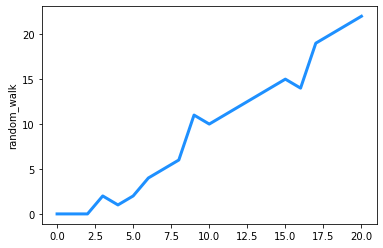

In [38]:
import matplotlib.pyplot as plt
plt.plot(random_walk, color="dodgerblue", linewidth=3)
plt.ylabel("random_walk")
plt.show()

### Simulate multiple walks
To get an idea about how big your chances are of reaching 60 steps, you can repeatedly simulate the random walk and collect the results.    

In [39]:
all_walks = []

# Simulate random walk 10 times
for i in range(20) :
    random_walk = [0]
    for x in range(10) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)

        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        random_walk.append(step)
        
    # Append random_walk to all_walks
    all_walks.append(random_walk)

print(all_walks)

[[0, 0, 0, 0, 0, 0, 1, 2, 3, 9, 8], [0, 0, 0, 1, 2, 3, 2, 3, 4, 3, 8], [0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 3], [0, 3, 4, 6, 7, 8, 9, 8, 7, 8, 9], [0, 1, 2, 1, 2, 3, 4, 7, 8, 9, 8], [0, 1, 0, 1, 2, 3, 7, 6, 5, 6, 7], [0, 1, 0, 1, 0, 1, 3, 8, 7, 8, 9], [0, 1, 2, 3, 4, 3, 4, 5, 6, 8, 10], [0, 0, 1, 2, 5, 4, 5, 4, 5, 6, 7], [0, 0, 1, 0, 1, 2, 4, 3, 2, 3, 4], [0, 0, 2, 3, 4, 5, 6, 7, 8, 7, 8], [0, 1, 6, 7, 6, 5, 4, 3, 4, 5, 6], [0, 5, 6, 5, 6, 7, 8, 9, 10, 11, 10], [0, 0, 1, 0, 6, 5, 6, 5, 6, 5, 6], [0, 4, 8, 10, 12, 11, 12, 14, 13, 19, 20], [0, 2, 3, 2, 3, 4, 5, 4, 5, 6, 7], [0, 2, 1, 0, 1, 7, 12, 11, 10, 14, 15], [0, 1, 2, 4, 3, 4, 3, 4, 3, 2, 8], [0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 7], [0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 6]]


**all_walks** is a list of lists: every sub-list represents a single random walk. If you convert this list of lists to a NumPy array, you can  make interesting plots.

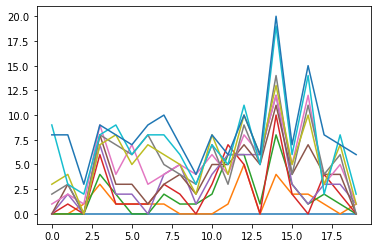

In [40]:
np_aw = np.array(all_walks)
plt.plot(all_walks)
plt.show()

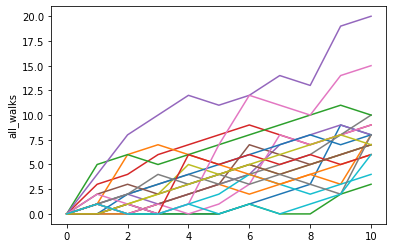

In [41]:
# by calling np.transpose() every row represents the position after 1 throw for the 10 random walks
np_aw_t = np.transpose(np_aw)
plt.plot(np_aw_t)
plt.ylabel("all_walks")
plt.show()

### Implement clumsiness
To implement the clumsy condition we need to call for another random number generation. Basically, you can generate a random float between 0 and 1. If this value is less than or equal to 0.001, you should reset step to 0.

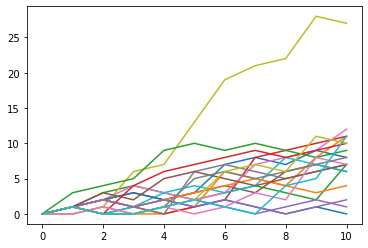

In [42]:
all_walks = []
for i in range(20) :
    random_walk = [0]
    for x in range(10) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)

        # Implement clumsiness
        if np.random.rand() <= 0.001 :
            step = 0

        random_walk.append(step)
    all_walks.append(random_walk)

# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))
plt.plot(np_aw_t)
plt.show()

### Plot the distribution
To finally solve the question _What are the odds that you'll reach 60 steps high on the Empire State Building?_
Basically, we want to know about the end points of all the random walks you've simulated. These end points have a certain distribution that you can visualize with a histogram.

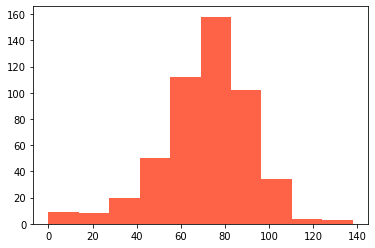

In [49]:
# Simulate random walk 500 times
all_walks = []
for i in range(500) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        if np.random.rand() <= 0.001 :
            step = 0
        random_walk.append(step)
    all_walks.append(random_walk)

# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))

# Select last row from np_aw_t: ends
ends = np.array(np_aw_t[-1, :])

# Plot histogram of ends, display plot
plt.hist(ends, color='tomato')
plt.show()